Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File 1 Head:
   time        s1       s2        s3
0     0  1.000000  2.00000  0.700000
1     1  1.010000  1.99995  0.707000
2     2  1.019999  1.99980  0.713999
3     3  1.029996  1.99955  0.720997
4     4  1.039989  1.99920  0.727993

File 1 Columns: ['time', ' s1', ' s2', ' s3']

File 2 Head:
   time        s1       s2        s3
0     0  1.000000  2.00000  0.700000
1     1  1.010000  1.99995  0.707000
2     2  1.019999  1.99980  0.713999
3     3  1.029996  1.99955  0.720997
4     4  1.039989  1.99920  0.727993

File 2 Columns: ['time', ' s1', ' s2', ' s3']

Correlation Matrix:
          time        s1        s2        s3      time        s1        s2  \
time  1.000000 -0.030442 -0.230218 -0.083324  1.000000 -0.083324 -0.230218   
 s1  -0.030442  1.000000  0.152738  0.960249 -0.030442  0.960249  0.152738   
 s2  -0.230218  0.152738  1.000000  0.059872 -0.230

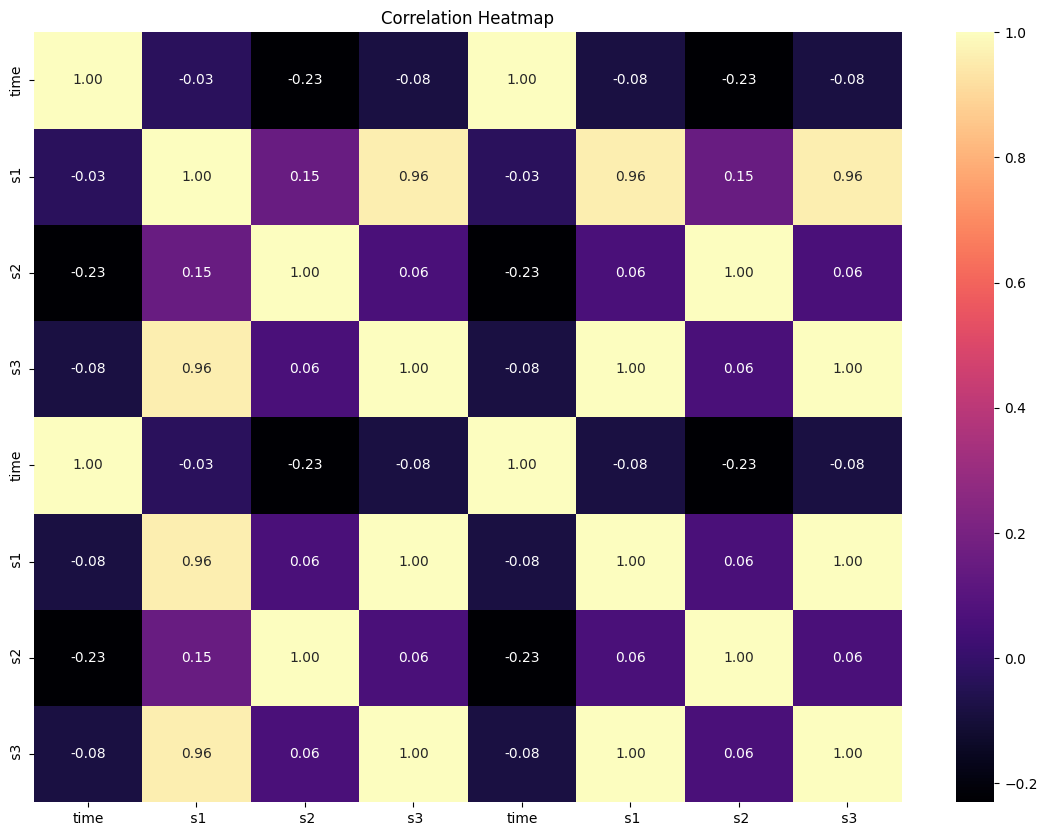

In [19]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
file1_path = '/content/drive/My Drive/iot/complex.csv'
file2_path = '/content/drive/My Drive/iot/simple.csv'

df1 = pd.read_csv(file1_path)
df2 = pd.read_csv(file2_path)

print("File 1 Head:")
print(df1.head())
print("\nFile 1 Columns:", df1.columns.tolist())
print("\nFile 2 Head:")
print(df2.head())
print("\nFile 2 Columns:", df2.columns.tolist())

combined_df = pd.concat([df1, df2], axis=1)
numeric_df = combined_df.select_dtypes(include=['number'])

corr_matrix = numeric_df.corr()
print("\nCorrelation Matrix:")
print(corr_matrix)

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='magma', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



The heatmaps clearly reveal the correlation patterns among the sensors. In the simple dataset, s1 and s3 are perfectly correlated, suggesting they may be duplicates or derived from the same source. Other variables show negligible correlation. In the complex dataset, a strong correlation (~ 0.96) exists between s1 and s3, indicating a strong linear relationship, but less than perfect, possibly due to added noise or complexity in the signal. A moderate correlation between s1 and s2 (~ 0.15) also appears, suggesting some shared behavior. These insights help in identifying sensor dependencies and refining data preprocessing for model development.